## TP2 : Classification using Linear & Quadratic Discriminant Analysis

First think of configuring your notebook :

In [1]:
import csv
import os
from pylab import *
import numpy as np
from numpy import linalg as la
import seaborn as sns 
from sklearn.metrics import f1_score, confusion_matrix,accuracy_score

## Reading synthetic data
Load the training and test data sets |synth_train.txt| and
|synth_test.txt| already used for Knn. Targets belong to {1,2} and entries belong to R^2.
We have 100 training data samples and 200 test samples.

* the 1st column contains the label of the class the sample, 
* columns 2 & 3 contain the coordinates of each sample in 2D.

In [2]:
train = np.loadtxt('synth_train.txt')
test = np.loadtxt('synth_test.txt')

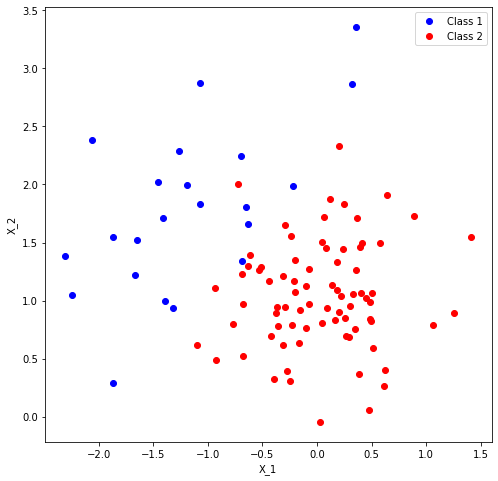

In [3]:
plt.figure(figsize=(8,8))
plt.scatter(train[train[:,0]==1][:,1],train[train[:,0]==1][:,2],c ="blue",label= "Class 1")
plt.scatter(train[train[:,0]==2][:,1],train[train[:,0]==2][:,2],c ="red",label= "Class 2")
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.legend()

On remarque que les deux classes peuvent etre séparable par une droite ce qui nous fait pensée à ce que une classification en utilisant LDA peut etre une bonne idée .Une classification en utilisant QDA peut marcher évidament.

## Recall about the main steps of discriminant analysis:
* estimation of weights `pi_1` and `pi_2` for each class,
* estimation of empirical means `mu_1` and `mu_2` for each class, 
* estimation of empirical covariance matrices  `sigma_1` and `sigma_2`,
* computation of the common averaged covariance `sigma` (average of intra-class covariances),
* computation of log-probabilities of belonging to each class,
* decision of classification,
* display results.


## TO DO : linear & quadratic discriminant analysis (LDA & QDA)
1. Implement a classifier using LDA of the data set. 
2. Then implement QDA classification.
3. In each case (LDA & QDA) show the decision boundary and
compute the error rate respectively for the training set and the test set. 
4. Compare and comment on your results with LDA and QDA.
5. You may also compare your results to K nearest neighbours.

_Indication 1 : matrices `sigma` are of size 2x2.
More generally, be careful of the sizes of vectors and matrices you
manipulate._

_Indication 2 : to display the regions of decision, you may use:_


In [15]:
Nx1=100 # number of samples for display
Nx2=100
x1=np.linspace(-2.5,1.5,Nx1)  # sampling of the x1 axis 
x2=np.linspace(-0.5,3.5,Nx2)  # sampling of the x2 axis
[X1,X2]=np.meshgrid(x1,x2)  
x=np.hstack((X1.flatten('F'),X2.flatten('F'))) # list of the coordinates of points on the grid
#N = size(x,axis=0)

# Then compute the sampled prediction class_L for each couple (X1,X2)

In [17]:
# For graphical representation  use code below for instance :
class_L = ...
plt.imshow(class_L, extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)) )
plt.show()

### Classifier using LDA of the data set

- Estimation of weights `pi_1` and `pi_2` for each class

In [18]:
classe_1,classe_2 = train[train[:,0] == 1][:,1:],train[train[:,0] == 2][:,1:]
N1,N2 = len(classe_1),len(classe_2)
N = train.shape[0]

In [20]:
pi_1 = N1/N
pi_2 = N2/N
# We verify if the sum of pi_k is equale to 1 
print("The sum of pi_1 and pi_2 is equal to :",pi_1+pi_2) 
print("pi_1 = ",pi_1)
print("pi_2 = ",pi_2)

The sum of pi_1 and pi_2 is equal to : 1.0
pi_1 =  0.22
pi_2 =  0.78


La condition que la somme des probabilité d'appartenance à une classe est assuré. Donc les probabilités forment une partition de l'ensemble des données. De plus on peut constater que l'ensemble de données d'entrainment n'est pas équilibré. On a 78% des données qui appartiennent à la classe 2 et 22% à la classe 1. (On peut donc s'attendre à avoir une précision supéreieur à 78%)

- Estimation of empirical means `mu_1` and `mu_2` for each class

In [157]:
mu_1 = np.sum(classe_1,axis=0)/N1
mu_2 = np.sum(classe_2,axis=0)/N2

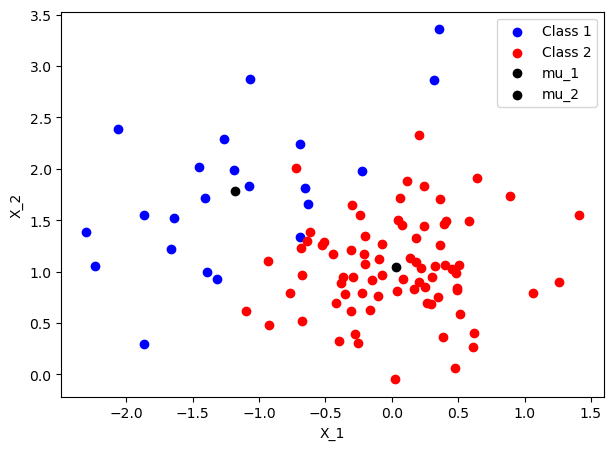

In [158]:
plt.figure(figsize=(7,5))
plt.scatter(classe_1[:,0],classe_1[:,1],c ="blue",label= "Class 1")
plt.scatter(classe_2[:,0],classe_2[:,1],c ="red",label= "Class 2")
plt.scatter(mu_1[0],mu_1[1],c ="black",label= "mu_1")
plt.scatter(mu_2[0],mu_2[1],c ="black",label= "mu_2")
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.legend()

-  Estimation of empirical covariance matrices  `sigma_1` and `sigma_2`

In [299]:
sigma_1 = (1/N1)*sum(np.dot((classe_1[k]-mu_1).reshape(2,1),(classe_1[k]-mu_1).reshape(2,1).T) for k in range(len(classe_1)))
sigma_2 = (1/N2)*sum(np.dot((classe_2[k]-mu_2).reshape(2,1),(classe_2[k]-mu_2).reshape(2,1).T) for k in range(len(classe_2)))

C:\Users\hicha\AppData\Local\Temp\ipykernel_18324\3194132442.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sigma_1 = (1/N1)*sum(np.dot((classe_1[k]-mu_1).reshape(2,1),(classe_1[k]-mu_1).reshape(2,1).T) for k in range(len(classe_1)))
C:\Users\hicha\AppData\Local\Temp\ipykernel_18324\3194132442.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sigma_2 = (1/N2)*sum(np.dot((classe_2[k]-mu_2).reshape(2,1),(classe_2[k]-mu_2).reshape(2,1).T) for k in range(len(classe_2)))


-  Estimation of empirical covariance matrices  `sigma` 

In [300]:
sigma  = pi_1*sigma_1+pi_2*sigma_2

In [301]:
print("The inverse of sigma_1 :",la.inv(sigma_1))
print("The inverse of sigma_2 :",la.inv(sigma_2))
print("The inverse of sigma :",la.inv(sigma))

The inverse of sigma_1 : [[ 3.10349613 -1.95962742]
 [-1.95962742  3.28796976]]
The inverse of sigma_2 : [[ 4.14864303 -0.38459556]
 [-0.38459556  4.82408556]]
The inverse of sigma : [[ 3.60135185 -1.10426636]
 [-1.10426636  4.03986407]]


On doit s'assurer que nos matrices de covariances sont inversible .Ce qui est le cas ici.

- Computation of log-probabilities of belonging to each class

In [213]:
# Log-liklihood 
def log_likelihood_LDA(x,sigma,pi_k,mu_k):
    """ Compute the log_likelihood function

    Args:
        x (np.array): feature
        sigma (matrix): covariance matrix
        pi_k (float): probability of being in Classe_k
        mu_k (np.array): mean of the distribution k 

    Returns:
        int _: log-Likelihood value .
    """
    return   np.log(pi_k) -1/2*np.dot((x-mu_k).T,np.dot(la.inv(sigma),x-mu_k))- (1/2)*np.log(np.linalg.det(sigma))

In [214]:
log_likelihood_LDA(test[0][1:],sigma,pi_1,mu_1)

-7.435416270663197

In [255]:
def decision_LDA(x):
    """Décision function to classify atributes 

    Args:
        x (array): Atribute

    Returns:
        int: 1 if x is in class 1 ,2 if not
    """
    if log_likelihood_LDA(x,sigma,pi_1,mu_1) > log_likelihood_LDA(x,sigma,pi_2,mu_2):
        return 1
    else: return 2

- Display results

In [256]:
prédictions_train = [decision_LDA(x) for x in train[:,1:]]
prédictions_test = [decision_LDA(x) for x in test[:,1:]]
train_precision = np.sum(np.array(prédictions_train) != train[:,0])/len(train)
test_precision = np.sum(np.array(prédictions_test) != test[:,0])/len(test)
print("Train error : ",train_precision)
print("Test error : ",test_precision)

Train error :  0.03
Test error :  0.055


#### Remarques :
- Les résultats s'avèrent convainquantes et ils confirme la remarque qu'on a fait à propos de la distribution des deux classes .
- Certes il faut visualiser nos résultats afin d'avoir une confirmation visuelle,c'est le sujet de la partie suivante.

In [257]:
Nx1 = test.shape[0] # number of samples for display
Nx2 = test.shape[0]
x1=np.linspace(-2.5,1.5,Nx1)  # sampling of the x1 axis 
x2=np.linspace(-0.5,4.5,Nx2)  # sampling of the x2 axis
[xx,yy]=np.meshgrid(x1,x2)  
#x = np.hstack((X1.flatten('F'),X2.flatten('F'))) # list of the coordinates of points on the grid
#N = size(x,axis=0)
xy = np.c_[xx.ravel(), yy.ravel()]

def visualise_test(classe_L,model_name=""):
    """Function to visualize results.

    Args:
        classe_L (array): The classification of the points of the plan
        model_name (str, optional): Name of the model used to classify"".
    """
    plt.contourf(xx, yy, classe_L, alpha=0.8, cmap=plt.cm.jet)
    #plt.scatter(test[:,1],test[:,2],c=test[:,0])
    plt.scatter(test[np.where(test[:,0]==1),1], test[np.where(test[:,0]==1),2], color="b", label="class 1")
    plt.scatter(test[np.where(test[:,0]==2),1], test[np.where(test[:,0]==2),2], color="r", label="class 2") 
    plt.title('Decision Boundary with '+str(model_name))
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.legend()
    plt.grid(True)
    plt.show()

In [258]:
class_L=[]
#Prediction of the plan points
for u in xy :   
    class_L.append(decision_LDA(u))
class_L = np.array(class_L).reshape(test.shape[0], test.shape[0])

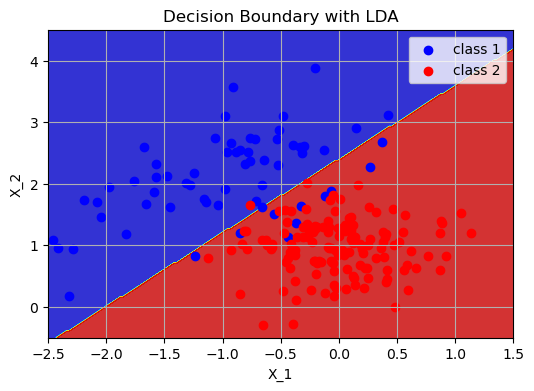

In [259]:
plt.figure(figsize=(6, 4))
visualise_test(class_L,"LDA")

#### autres metrics :
- On pense à évaluer encore plus notre model, pour ça on va calculer le f1_score, l'accuraccy et la matrice de confusion .

In [260]:
y_test = test[:,0]
f1_score_LDA = f1_score(y_test,prédictions_test)
confusion_matrix_lda = confusion_matrix(y_test,prédictions_test)
accuracy = accuracy_score(y_test,prédictions_test)
print("f1-score of LDA : ",f1_score_LDA)
print("Accuracy of LDA model : ",accuracy)

f1-score of LDA :  0.9043478260869565
Accuracy of LDA model :  0.945


Text(0.5, 1.0, 'Confusion matrix of LDA model')

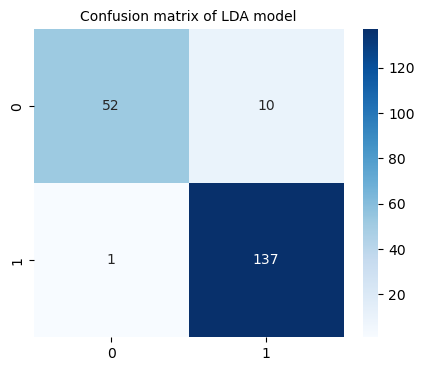

In [261]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix_lda, annot=True, fmt="d",cmap="Blues")
plt.title("Confusion matrix of LDA model",fontsize=10)

On voit que le modèle s'avère être très bon pour la classe 2 et moins bon pour la classe 1. Ce qui est normal vu que la classe 2 est plus représenté dans l'ensemble de données d'entrainement. Mathématiquement dans la comparaison de deux $likelihood$ on a le terme $\log(\pi_k)$ qui fait la différence lorque on s'approche de la frontière de décision.

### Classifier using QDA of the data set

Dans cette partie on implémente une classification avec un modèle QDA , la seul différence entre ce modèle et le modèle LDA c'est que dans ce modèle pour évaluer la log-vraissemblance ce fait avec sigma_1 et sigma_2 séparèment afin de faire la classification.(cf la fonction ci-dessous) 

In [303]:
def decision_QDA(x):
    if log_likelihood_LDA(x,sigma_1,pi_1,mu_1) > log_likelihood_LDA(x,sigma_2,pi_2,mu_2):
        return 1
    else: return 2

In [304]:
prédictions_train = [decision_QDA(x) for x in train[:,1:]]
prédictions_test = [decision_QDA(x) for x in test[:,1:]]
train_precision = np.sum(np.array(prédictions_train) != train[:,0])/len(train)
test_precision = np.sum(np.array(prédictions_test) != test[:,0])/len(test)
print("Train error : ",train_precision)
print("Test error : ",test_precision)

Train error :  0.05
Test error :  0.05


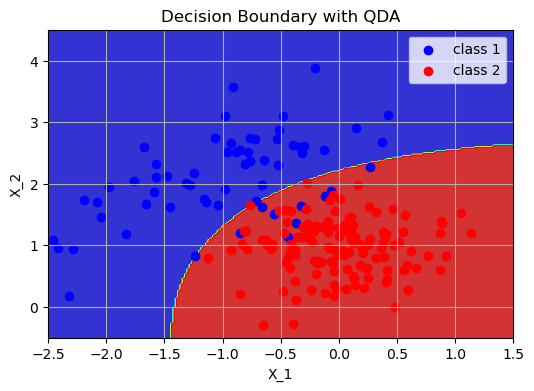

In [305]:
plt.figure(figsize=(6, 4))
class_L=[]
for u in xy :   
    class_L.append(decision_QDA(u))
class_L = np.array(class_L).reshape(test.shape[0], test.shape[0])
visualise_test(class_L,"QDA")

- Metrics : 

In [306]:
y_test = test[:,0]
f1_score_QDA = f1_score(y_test,prédictions_test)
confusion_matrix_qda = confusion_matrix(y_test,prédictions_test)
accuracy = accuracy_score(y_test,prédictions_test)
print("f1-score of QDA : ",f1_score_QDA)
print("Accuracy of QDA model : ",accuracy)

f1-score of QDA :  0.9137931034482759
Accuracy of QDA model :  0.95


Text(0.5, 1.0, 'Confusion matrix of QDA model')

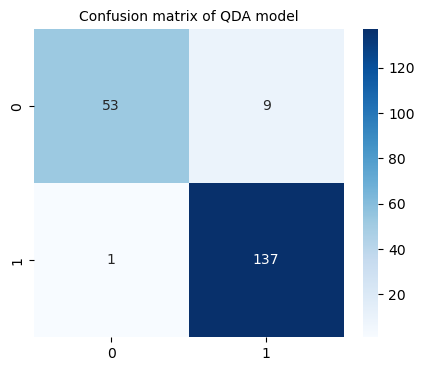

In [307]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix_qda, annot=True, fmt="d",cmap="Blues")
plt.title("Confusion matrix of QDA model",fontsize=10)

On voit bien que le modèle LDQ est aussi une bonne estimation de la distribution des données avec une légère amélioration par rapport au modèle LDA.

### KNN Approch

Dans cette partie on implémente un autre type de classification , c'est la classification avec le principe des K plus pproches voisins .

In [308]:
def knn(x_train, class_train, x_test, k):
    """
    KNN implementation
    Parametrs : 
        x_train: training data
        class_train: class of training data
        x_test: test data
        k: number of neighbours to consider
    Output: 
        predictions 
    """
    N_test = x_test.shape[0]
    N_train = x_train.shape[0]
    class_test = np.zeros(N_test).astype(int)
    for i in range(N_test):
        dist = np.sum((x_train - x_test[i,:])**2, axis=1)
        idx = np.argsort(dist)[:k]
        class_test[i] = np.argmax(np.bincount(class_train[idx].astype(int)))
    return class_test


Le paramètrs k est un paramètre déterminant  dans cette méthode, pour cela on va évaluer notre algorithme en fonction du paramètres k afin de choisir le meilleur k.

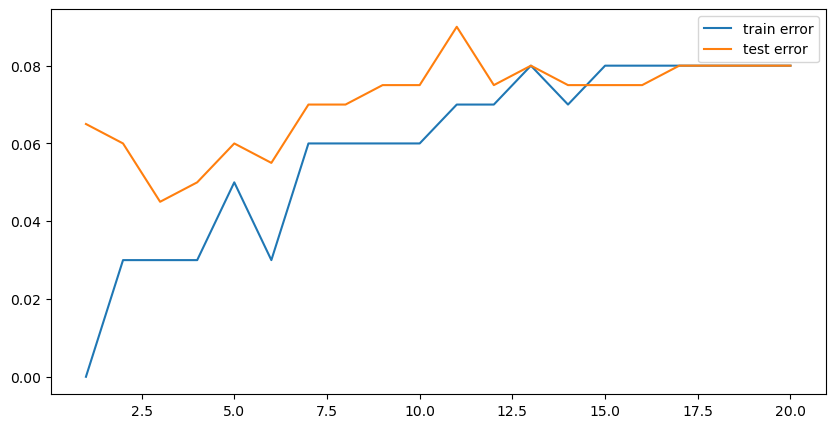

In [309]:
train_error = np.zeros(20)
test_error = np.zeros(20)
x_train = train[:,1:]
x_test = test[:,1:]
class_train = train[:,0]


for k in range(1,21):
    pred_class_train = knn(x_train, class_train, x_train, k)
    train_error[k-1] = np.mean(pred_class_train != class_train.astype(int))
    pred_class_test =knn(x_train, class_train, x_test, k)
    test_error[k-1] = np.mean(pred_class_test != test[:,0].astype(int))


plt.figure(figsize=(10,5))
plt.plot(range(1,21), train_error, label="train error")
plt.plot(range(1,21), test_error, label="test error")
plt.legend()

On remarque que le meilleur compromis entre l'érreur de test et d'entrainement est pour k=3. dans la suite on va considérer k=3 pour faire la classification avec KNN et on visualisera les résultats: 

In [310]:
k = 3
pred_class_train = knn(x_train, class_train, x_train, k)
train_error = np.mean(pred_class_train != class_train.astype(int))
pred_class_test =knn(x_train, class_train, x_test, k)
test_error = np.mean(pred_class_test != test[:,0].astype(int))
print("Train error : ",train_error)
print("Test error : ",test_error)

Train error :  0.03
Test error :  0.045


In [311]:
y_test = test[:,0]
f1_score_KNN = f1_score(y_test,pred_class_test)
confusion_matrix_KNN = confusion_matrix(y_test,pred_class_test)
accuracy_KNN = accuracy_score(y_test,pred_class_test)
print("f1-score of KNN : ",f1_score_KNN)
print("Accuracy of KNN model : ",accuracy_KNN)

f1-score of KNN :  0.9243697478991597
Accuracy of KNN model :  0.955


Text(0.5, 1.0, 'Confusion matrix of KNN model')

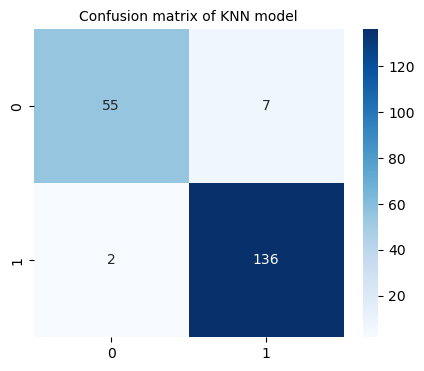

In [312]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix_KNN, annot=True, fmt="d",cmap="Blues")
plt.title("Confusion matrix of KNN model",fontsize=10)

In [313]:
Nx_1 = x_test.shape[0] # number of samples for display
Nx_2 = x_test.shape[0]
x_1=np.linspace(-2.5,1.5,Nx_1)  # sampling of the x1 axis 
x_2=np.linspace(-0.5,4.5,Nx_2)  # sampling of the x2 axis
[xxp,yyp]=np.meshgrid(x_1,x_2)  
#x = np.hstack((X1.flatten('F'),X2.flatten('F'))) # list of the coordinates of points on the grid
#N = size(x,axis=0)
xyp = np.c_[xxp.ravel(), yyp.ravel()]
pred_class_test = knn(x_train,class_train,xyp,3)
pred_class_test = pred_class_test.reshape(test.shape[0], test.shape[0])


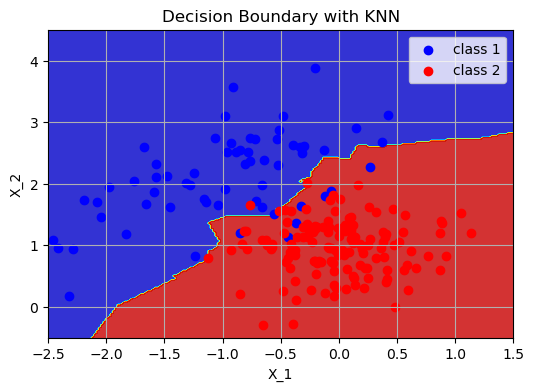

In [314]:
    
plt.figure(figsize=(6, 4))
plt.contourf(xxp, yyp, pred_class_test, alpha=0.8, cmap=plt.cm.jet)
    #plt.scatter(test[:,1],test[:,2],c=test[:,0])
plt.scatter(test[np.where(test[:,0]==1),1], test[np.where(test[:,0]==1),2], color="b", label="class 1")
plt.scatter(test[np.where(test[:,0]==2),1], test[np.where(test[:,0]==2),2], color="r", label="class 2") 
plt.title('Decision Boundary with KNN')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.legend()
plt.grid(True)
plt.show()

Le modèle KNN est aussi une bonne estimation de la distribution des données avec une amélioration par rapport au modèle LDA et QDA.Cette amélioration peut être attribuée à la variance accrue de KNN par rapport aux autres modèles. Cependant, il est important de noter que cette plus grande variance peut potentiellement introduire des biais lors de l'application de la validation croisée par exemple.

## TO DO : LDA & QDA using scikit-learn module

The module `scikit-learn` is dedicated to machine learning algorithms. Many of them are available in a simple manner. For LDA and QDA, have a look at the tutorial available at http://scikit-learn.org/stable/modules/lda_qda.html 

**Warning** : you may have a critical view of the way LDA and QDA are illustrated in the proposed example...




In [169]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 

- Creation of the models

In [284]:
lda = LinearDiscriminantAnalysis(store_covariance=True)
qda = QuadraticDiscriminantAnalysis(store_covariance=True)

- Models traning

In [285]:
X_train = train[:, 1:]
y_train = train[:, 0]
X_test = test[:,1:]
y_test = test[:,0]

lda.fit(X_train,y_train)
qda.fit(X_train,y_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

- priors

In [286]:
lda.priors_, qda.priors_ # pi_1 and pi_2

(array([0.22, 0.78]), array([0.22, 0.78]))

- means

In [287]:
lda.means_, qda.means_ # mu_1 and mu_2

(array([[-1.18350693,  1.78655437],
        [ 0.02868973,  1.04424548]]),
 array([[-1.18350693,  1.78655437],
        [ 0.02868973,  1.04424548]]))

- covariance matrices

In [288]:
lda.covariance_ # sigma

array([[0.3030754 , 0.08284337],
       [0.08284337, 0.27017769]])

In [289]:
qda.covariance_ # sigma_1 and sigma_2

[array([[0.54124863, 0.32258376],
        [0.32258376, 0.51088153]]),
 array([[0.24599115, 0.01961141],
        [0.01961141, 0.21154879]])]

In [302]:
print("sigma_1 :",sigma_1)
print("sigma_2 :",sigma_2)
print("sigma :",sigma)

sigma_1 : [[0.51664642 0.30792087]
 [0.30792087 0.48765965]]
sigma_2 : [[0.24283742 0.01935998]
 [0.01935998 0.20883663]]
sigma : [[0.3030754  0.08284337]
 [0.08284337 0.27017769]]


On remarque que les moyennes et les poids sont les mêmes que ceux qu'on a obtenu avec nos implémentations. par contre les matrices de covariances sont différentes. Cela est dû à la façon dont les matrices de covariances sont calculées dans la fonction sklearn. En fait la fonction sklearn calcule les matrices de covariances par l'estimateur **sans biais** : $\frac{1}{n-1} \sum_{i=1}^{n}(x_i-\bar{x})(x_i-\bar{x})^T$ alors que nous on a utilisé la formule: $\frac{1}{n} \sum_{i=1}^{n}(x_i-\bar{x})(x_i-\bar{x})^T$. 

- Predictions of the test dataset

In [291]:
lda_predictions = lda.predict(X_test)
qda_predictions = qda.predict(X_test)

- Accuraccy of the models 

In [292]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

lda_accuracy = accuracy_score(y_test, lda_predictions)
qda_accuracy = accuracy_score(y_test, qda_predictions)
print("LDA accuracy : ",lda_accuracy)
print("QDA accuracy : ",qda_accuracy)

LDA accuracy :  0.945
QDA accuracy :  0.95


In [293]:
F1_score_LDA = f1_score(y_test, lda_predictions)
F1_score_QDA = f1_score(y_test, qda_predictions)
print("F1-Score of LDA : ",F1_score_LDA)
print("F1-Score of QDA : ",F1_score_QDA)

F1-Score of LDA :  0.9043478260869565
F1-Score of QDA :  0.9137931034482759


Text(0.5, 1.0, 'Confusion matrix of QDA model')

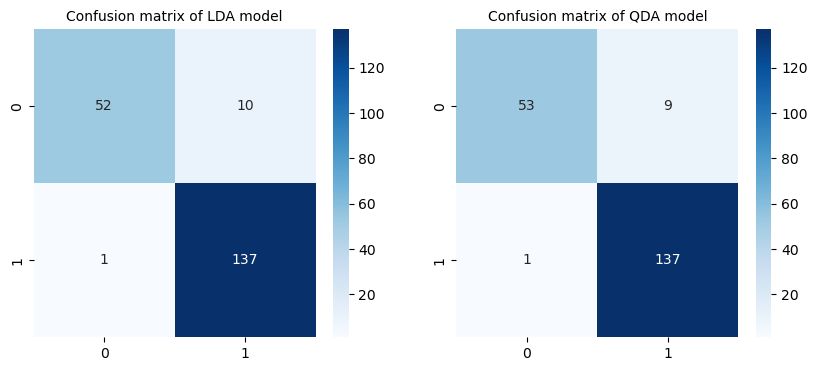

In [294]:
Confusion_matrix_LDA = confusion_matrix(y_test, lda_predictions)
Confusion_matrix_QDA = confusion_matrix(y_test, qda_predictions)
plt.figure(figsize=(10,4))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
sns.heatmap(Confusion_matrix_LDA, annot=True, fmt="d",cmap="Blues",ax=ax1)
ax1.set_title("Confusion matrix of LDA model",fontsize=10)
sns.heatmap(Confusion_matrix_QDA, annot=True, fmt="d",cmap="Blues",ax=ax2)
ax2.set_title("Confusion matrix of QDA model",fontsize=10)

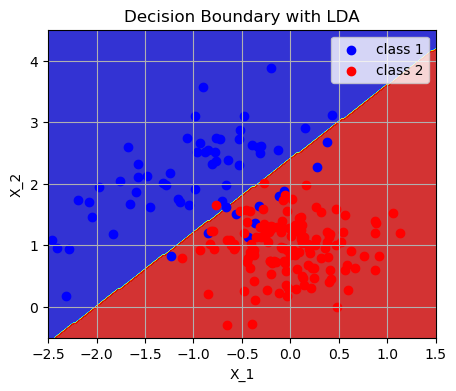

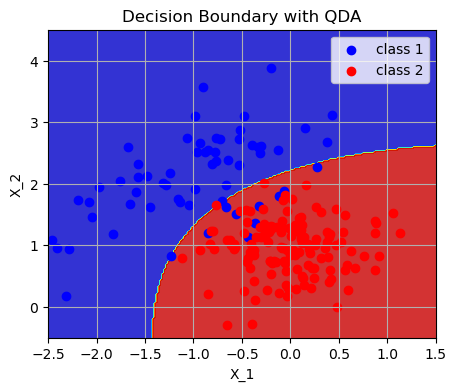

In [274]:
plt.figure(figsize=(5, 4))
class_L = lda.predict(xy)
class_L = np.array(class_L).reshape(test.shape[0], test.shape[0])
visualise_test(class_L,"LDA") 
plt.figure(figsize=(5, 4))
class_L = qda.predict(xy)
class_L = np.array(class_L).reshape(test.shape[0], test.shape[0])
visualise_test(class_L,"QDA")


**Conclusion :**

Au cours de ce TP, nous avons suivi les étapes de la classification en utilisant les modèles LDA et QDA. Nous avons également mis en œuvre un modèle KNN pour effectuer la classification. De plus, nous avons exploité la bibliothèque sklearn pour effectuer la classification à l'aide des modèles LDA et QDA, puis avons comparé les résultats obtenus avec les différents modèles.

Il est crucial de noter que l'application des modèles LDA et QDA repose sur l'hypothèse selon laquelle les données suivent une distribution normale, une supposition qui ne correspond pas toujours à la réalité. Cette notion peut être étendue à des distributions plus complexes, telles que celles abordées par les modèles **Kernel Discriminant Analysis (KDA)** ou **Mixture Discriminant Analysis (MDA)**. De plus, ces modèles nécessitent le calcul de matrices inverses, ce qui peut s'avérer coûteux lorsque les matrices sont de grande taille ou mal conditionnées.